### 專題 1 . $\pi$ 的估計

- 使用到蒙地卡羅法

- 假設圓半徑為 1 ，所畫圓形面積的$\frac{1}{4}$ 為 $\frac{1}{4}\pi$ ， 相對應的正方形面積為1

- 此時需統計落在圓內&圓外的點的比例，假設總共有 n 點 ，落在圓內的點有c點，那此時 $\frac{1}{4}\pi$ : 1 = c : n

- 承上，可推得 $ \pi = 4\times c \div n$ ， 此時可得到接近3.14之數字 ， 當 n 越大，代表樣本取越多，數值將更為趨近平均值

- 可使用 mpatches 模組簡易畫正方形 ( 圓也可以 )  ( 設定 : 左下角座標 , 長 , 寬 )

3.1528


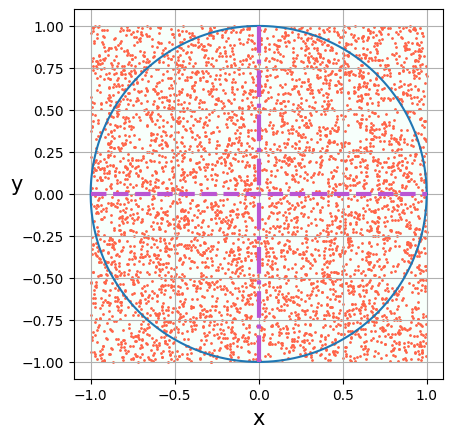

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
import matplotlib.patches as mpatches

r = 1
theta = np.linspace(0, 2*np.pi, 200)
r_y = r*np.sin(theta)
r_x = r*np.cos(theta)
loc = -1
scale = 2
size = 5000
x = uniform.rvs(loc=loc, scale=scale, size=size)
y = uniform.rvs(loc=loc, scale=scale, size=size)

x_left = -1
x_right = 1
x_line = np.linspace(x_left, x_right, 200)

rec_loc = np.array([-1, -1])
rectangle = mpatches.Rectangle(rec_loc, 2, 2, alpha=0.8, color="mintcream")

sum = np.sqrt(x**2+y**2)
dot_in_circle = (sum <= 1).sum()
pi = 4*dot_in_circle/size

print(pi)

ax = plt.gca()
ax.grid(True)
ax.plot(r_x, r_y)
ax.add_patch(rectangle)
ax.scatter(x, y, color="tomato", s=1)
ax.plot(x_line, 0*x_line, color="mediumorchid", lw=3, linestyle="--")
ax.plot(0*x_line, x_line, color="mediumorchid", lw=3, linestyle="-.")
ax.set_xlabel("x", fontsize=15)
ax.set_ylabel("y", fontsize=15, rotation=0)
ax.set_aspect(1)


### 專題3 以蒙地卡羅實驗驗證 J-B 檢定統計量


C:\Users\user\AppData\Local\Temp\ipykernel_7576\2954276760.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(n)


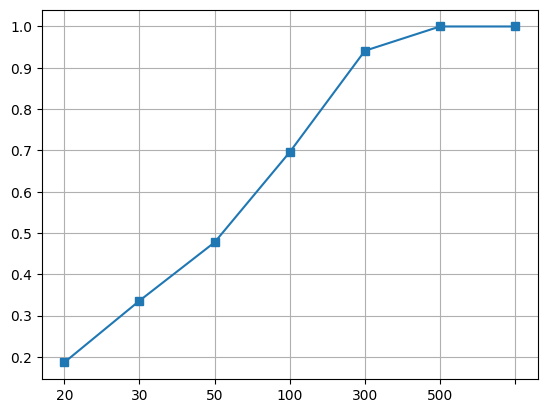

'\nplt.hist(p_val,bins=10,alpha=0.6,edgecolor="y",lw=1)\npower=(p_val<=alfa).mean()\nprint(\'Power ( 顯著水準 ) = {} at n = {}\'.format(power,n))\nplt.show()\n\n'

In [24]:
import numpy as np 
from scipy.stats import norm, ttest_ind
import matplotlib.pyplot as plt 

# 雙檢定t檢定 ( 產生兩組資料均來自常態)
n=[10,20,30,50,100,300,500] # 樣本數
N=10000*5  # 實驗次數
p_val=np.zeros(len(n))
alfa=0.05
mu1,s1=0,1
mu2,s2=0.5,1

power=np.zeros(len(n))

# 迴圈作法
# for i in range(N): 
    # x1=norm.rvs(loc=0,scale=1,size=n)
    # x2=norm.rvs(loc=0,scale=1,size=n)
    # s,p_val[i] = ttest_ind(x1,x2)
    
#  broadcasting
for i in range(len(n)):
    x1=norm.rvs(loc=mu1,scale=s1,size=(n[i],N))
    x2=norm.rvs(loc=mu2,scale=s2,size=(n[i],N))
    s,p_val= ttest_ind(x1,x2)
    power[i]=(p_val<=alfa).mean()

fig,ax=plt.subplots()
ax.plot(np.arange(len(n)),power,marker="s")
ax.set_xticklabels(n)
ax.grid(True)
plt.show()
        

"""
plt.hist(p_val,bins=10,alpha=0.6,edgecolor="y",lw=1)
power=(p_val<=alfa).mean()
print('Power ( 顯著水準 ) = {} at n = {}'.format(power,n))
plt.show()

"""






In [26]:
import numpy as np 

n=[10,20,30,50,100,300,500]

print(np.arange(len(n)))

[0 1 2 3 4 5 6]


### 專題 2. Skewness ( G1 ( 統計量 ) = 根號 ( N / 6))

C:\Users\user\AppData\Local\Temp\ipykernel_7576\4237270617.py:15: RuntimeWarning: invalid value encountered in sqrt
  G2= np.sqrt((n/24)*kurtosis(x1))


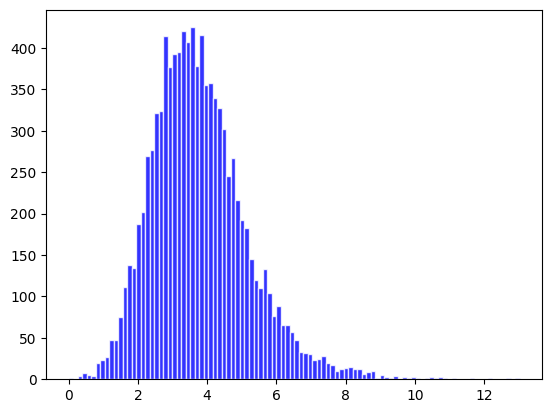

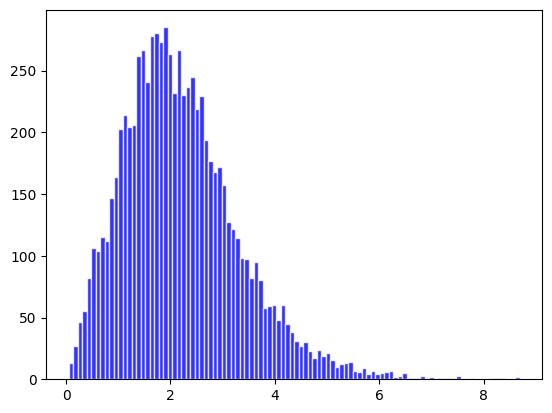

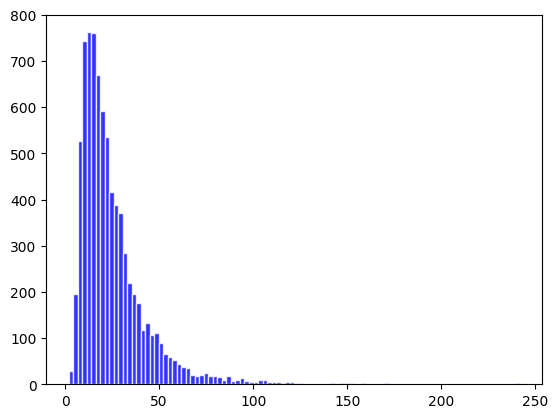

In [43]:
from scipy.stats import norm,skew ,kurtosis,chi2
import numpy as np 
import matplotlib.pyplot as plt 

n=100 #樣本數
N=10000    # 實驗次數
alfa=0.05 
# x1 = norm.rvs(loc=0,scale=1,size=(n,N))
x1=chi2.rvs(df=8,size=(n,N))
G1=np.sqrt(n/6) * skew(x1)
p_val=1-norm.cdf(G1)
# print("g1 ={} , p-value = {}".format(G1,p_val))
# plt.hist(g1,bins=10,alpha=0.6,color="b",edgecolor="y",lw=1)
# plt.show()
G2= np.sqrt((n/24)*kurtosis(x1))
p_val2=1-norm.cdf(G2)

JB=G1**2+G2**2

def my_JB(x):
    n=x.shape[0]
    G1=np.sqrt(n/6) * skew(x1)
    G2= np.sqrt((n/24)*kurtosis(x1))
    JB=G1**2+G2**2 
    return JB


    
    

plt.hist(G1,bins=100,alpha=0.8,color="b",edgecolor="w")
plt.show()

plt.hist(G2,bins=100,alpha=0.8,color="b",edgecolor="w")
plt.show()

plt.hist(JB,bins=100,alpha=0.8,color="b",edgecolor="w")
plt.show()